In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [47]:
# Load in the full dataset
df = pd.read_csv("FE_final_data.csv")

df.head()

,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Tools_Used_Chatbots,...,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage,KNNCluster1,KNNCluster2,LDA_Prediction,AI_Satisfaction
0,165,2,3,0,3,0,1,0,1,1,...,1,1,1,1,2,3,0,0,0,1
1,165,1,1,1,2,1,1,0,1,1,...,1,0,0,0,2,3,0,0,1,1
2,165,2,3,1,2,1,11,1,1,0,...,1,1,0,0,2,1,0,0,0,1
3,165,2,4,1,2,1,11,1,1,0,...,1,1,0,1,2,0,0,0,0,1
4,165,1,1,1,2,0,11,1,1,1,...,0,1,0,1,2,1,0,0,0,1


In [48]:
# Split the dataset into training and testing sets (78% - 22% split) based off of our calculations
X = df.drop(columns = ['AI_Satisfaction'])
y = df['AI_Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 3)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# This is for producing the same results
random.seed(3)

# Defining the model
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(124, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the model
model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
history = model.fit(X_train_scaled, y_train, epochs = 100, batch_size = 512, validation_split = 0.33)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step - accuracy: 0.8152 - loss: 0.5933 - val_accuracy: 0.8171 - val_loss: 0.5213
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8152 - loss: 0.5189 - val_accuracy: 0.8171 - val_loss: 0.4706
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8152 - loss: 0.4567 - val_accuracy: 0.8171 - val_loss: 0.4428
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8152 - loss: 0.4309 - val_accuracy: 0.8171 - val_loss: 0.4284
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8152 - loss: 0.4032 - val_accuracy: 0.8171 - val_loss: 0.4169
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8152 - loss: 0.3816 - val_accuracy: 0.8232 - val_loss: 0.4082
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8242 - loss: 0.3599 - val_accuracy: 0.8354 - val_loss: 0.4046
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8364 - loss: 0.3446 - val_accuracy: 0.8354 - val_loss

Epoch 52/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9485 - loss: 0.1163 - val_accuracy: 0.7744 - val_loss: 0.6696
Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9515 - loss: 0.1385 - val_accuracy: 0.8171 - val_loss: 0.7108
Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9606 - loss: 0.1104 - val_accuracy: 0.8110 - val_loss: 0.7205
Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9515 - loss: 0.1109 - val_accuracy: 0.7744 - val_loss: 0.6858
Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9576 - loss: 0.1153 - val_accuracy: 0.8110 - val_loss: 0.7370
Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9576 - loss: 0.1098 - val_accuracy: 0.7744 - val_loss: 0.7055
Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9697 - loss: 0.1018 - val_accuracy: 0.8049 - val_loss: 0.7541
Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9697 - loss: 0.0911 - val_accuracy: 0.7988 - v

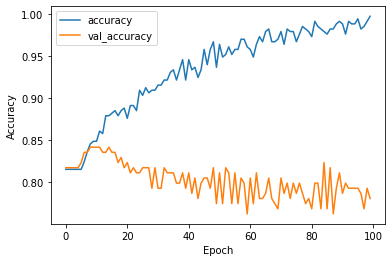

In [105]:
# Plotting the training history
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
When predicting on the test dataset, the accuracy of NN was: 85.71 %
When predicting on the test dataset, the recall of NN was: 93.22 %
When predicting on the test dataset, the precision of NN was: 90.16 %


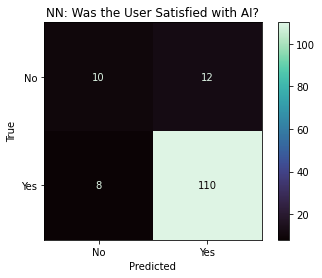

In [106]:
# Predicting on the test set
predictions = model.predict(X_test_scaled)
predicted_class = (predictions >= 0.5).astype(int)

# Displaying the Confusion Matrix 
cf_matrix = confusion_matrix(y_test, predicted_class)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['No', 'Yes'])
cmd.plot(cmap = 'mako')
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True', title = 'NN: Was the User Satisfied with AI?')

# Printing results
print("When predicting on the test dataset, the accuracy of NN was:", np.round((accuracy_score(y_test, predicted_class) * 100), 2), "%")
print("When predicting on the test dataset, the recall of NN was:", np.round((recall_score(y_test, predicted_class) * 100), 2), "%")
print("When predicting on the test dataset, the precision of NN was:", np.round((precision_score(y_test, predicted_class) * 100), 2), "%")


In [107]:
# This is to try and stop the NN from overfitting

# Performing PCA on the training features.
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Creating a new model for PCA-reduced data and adding a early dropout to see if the model's accuracy will increase.
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_dim = X_train_pca.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(124, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(12, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))


In [108]:
# Compile the second model
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

# Fit the second model with early stopping
history_pca = model2.fit(X_train_pca, y_train, epochs = 100, batch_size = 512,
                         validation_split = 0.33, callbacks = [early_stopping])



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - accuracy: 0.7152 - loss: 0.6309 - val_accuracy: 0.8171 - val_loss: 0.4922
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8061 - loss: 0.5289 - val_accuracy: 0.8171 - val_loss: 0.4473
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8182 - loss: 0.4781 - val_accuracy: 0.8171 - val_loss: 0.4240
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8182 - loss: 0.4209 - val_accuracy: 0.8171 - val_loss: 0.4052
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8242 - loss: 0.4159 - val_accuracy: 0.8354 - val_loss: 0.4055
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8515 - loss: 0.3833 - val_accuracy: 0.8476 - val_loss: 0.3954
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8455 - loss: 0.3559 - val_accuracy: 0.8354 - val_loss: 0.3960
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8455 - loss: 0.3592 - val_accuracy: 0.8476 - val_loss

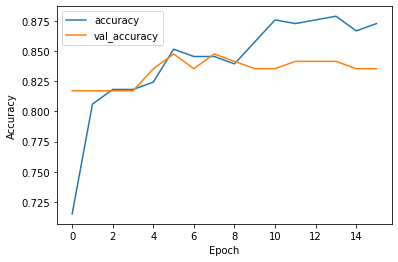

In [109]:
# Plot training history for PCA model
plt.plot(history_pca.history['accuracy'], label='accuracy')
plt.plot(history_pca.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
When predicting on the test dataset, the accuracy of NN was: 84.29 %
When predicting on the test dataset, the recall of NN was: 100.0 %
When predicting on the test dataset, the precision of NN was: 84.29 %


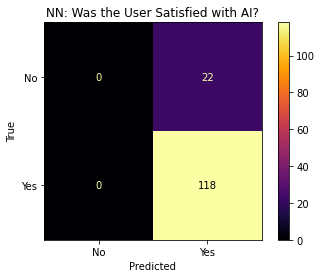

In [110]:
# Predict on the test set using PCA-reduced data
predictions_pca = model2.predict(X_test_pca)
predicted_class_pca = (predictions_pca >= 0.5).astype(int)

# Displaying the Confusion Matrix 
cf_matrix = confusion_matrix(y_test, predicted_class_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['No', 'Yes'])
cmd.plot(cmap = 'inferno')
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True', title = 'NN: Was the User Satisfied with AI?')

# Printing results
print("When predicting on the test dataset, the accuracy of NN was:", np.round((accuracy_score(y_test, predicted_class_pca) * 100), 2), "%")
print("When predicting on the test dataset, the recall of NN was:", np.round((recall_score(y_test, predicted_class_pca) * 100), 2), "%")
print("When predicting on the test dataset, the precision of NN was:", np.round((precision_score(y_test, predicted_class_pca) * 100), 2), "%")


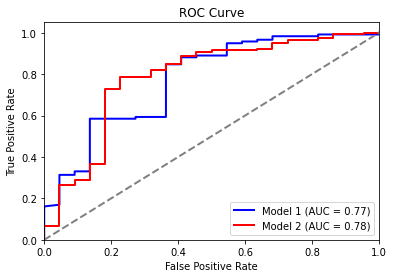

In [111]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

fpr_pca, tpr_pca, _ = roc_curve(y_test, predictions_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'Model 1 (AUC = {roc_auc:.2f})')
plt.plot(fpr_pca, tpr_pca, color='red', lw = 2, label = f'Model 2 (AUC = {roc_auc_pca:.2f})')
plt.plot([0, 1], [0, 1], color = 'gray', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()